# Mesh_size analysis
Average temperature_Tetra
2024-09-05 yanjun zhang

## Absolute error

Lables already exists, for mesh m-3-20.msh is  [1713, 1587, 708]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/thermal_2024/implicit_dx/s-608-d-224-m-3-20-c-1-e-8476/Result_T-s-608-d-224-m-3-20-c-1-e-8476.csv
Lables already exists, for mesh m-3-10.msh is  [3157, 7018, 2141]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/thermal_2024/implicit_dx/s-608-d-224-m-3-10-c-1-e-43604/Result_T-s-608-d-224-m-3-10-c-1-e-43604.csv
Lables already exists, for mesh m-3-5.msh is  [19098, 34079, 7351]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/thermal_2024/implicit_dx/s-608-d-224-m-3-5-c-1-e-271817/Result_T-s-608-d-224-m-3-5-c-1-e-271817.csv


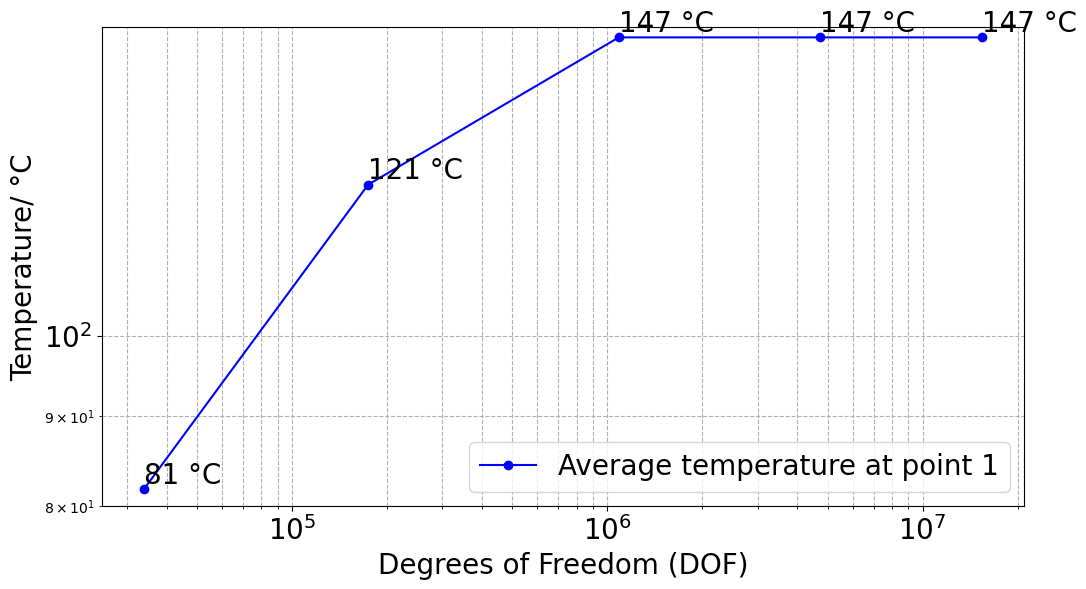

In [7]:
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

# Adding path for your custom functions (if needed)
sys.path.append('/home/yanjun/documents/fenicsx/therm_disc/')
from disc_f import *  # Assuming this file has functions like collect_csv_files, extract_file_labels, etc.

# Directory containing your simulation results
source_dir = '/home/yanjun/documents/sim_results/thermal_2024/implicit_dx/'
# Collect all CSV files from the directory
csv_files = collect_csv_files(source_dir)
# Sort CSV files by mesh size or other labels (e.g., 'mesh_size')
type1 = 'mesh_size'
csv_files.sort(key=lambda x: extract_file_labels(x, type1))


# Initialize lists to store DOF and average relative errors for each case
dof_list = []
avg_relative_errors = []

# Loop over all CSV files (cases)
for csv_file in csv_files[0:3]:
    # Extract mesh information and calculate DOF (elements * 4)
    labels = find_3_coord(extract_mesh_labels(csv_file))
    num_elements = extract_file_labels(csv_file, type1)
    dof = int(num_elements) * 4  # DOF calculation
    # Read simulated time and temperature data
    t, T = read_t_T(csv_file)
    # Calculate average temperature at the three labels
    T_3_ave = []
    for i in range(len(T)):
        #T_3_all = T[i][labels[0]] + T[i][labels[1]] + T[i][labels[2]]
        
        T_3_ave.append(T[i][labels[0]] )
    import numpy as np
    # Assuming T_e_ave is larger and you want to resize it to match T_3_ave
    # Generate corresponding time arrays for interpolation

    time_T_3_ave = np.linspace(0, 49, len(T_3_ave))  # Time for T_3_ave (example)

 
    # Compute relative error between experimental (T_e_ave) and simulation (T_3_ave)
    # Store DOF and the average relative error for this case
    dof_list.append(dof)
    avg_relative_errors.append(np.mean(T_3_ave))

## 4 and 6 is the extract csv files for m-3-2 and m-3-3.

marker_styles = ['o', 's', '^', 'v', '>', '<','d' ] 
csv_files1 = [ csv_files[3] , csv_files[5] ]
labels=['trtra-n-1184080','trtra-n-3852374']
dof_list.append(1184080*4 )
dof_list.append(3852374*4 )

for csv_file in csv_files1:
    df = pd.read_csv(csv_file)
    import numpy as np
    # Assuming T_e_ave is larger and you want to resize it to match T_3_ave

    time_T_3_ave = np.linspace(0, 49, len(df['Time']))  # Time for T_3_ave (example)
   
 
    avg_relative_errors.append(np.mean(T_3_ave))
    

# Plot DOF vs Average Relative Error
fontsize_global = 20

plt.figure(figsize=(11, 6))
plt.loglog(dof_list, avg_relative_errors, marker='o', linestyle='-', color='b', label="Average temperature at point 1")
plt.ylim(80, 150)

for i in range(len(avg_relative_errors)):
    plt.text(dof_list[i], avg_relative_errors[i],f'{int(avg_relative_errors[i])} °C', ha='left', va='bottom', fontsize=fontsize_global)

# Use the global font size for all text elements
plt.xlabel('Degrees of Freedom (DOF)', fontsize=fontsize_global)
plt.ylabel('Temperature/ °C', fontsize=fontsize_global)
#plt.title('Relative Error vs Degrees of Freedom', fontsize=fontsize_global)

# Set the font size for tick labels
plt.xticks(fontsize=fontsize_global)
plt.yticks(fontsize=fontsize_global)

# Add grid and legend with the global font size
plt.grid(True, which="both", ls="--")
plt.legend(fontsize=fontsize_global)
plt.tight_layout()

# Save and display the plot
plt.savefig('ave_T_vs_dof.png')
plt.show()


In [12]:
print ( dof_list[:-3] )
print ( avg_relative_errors)

[33904, 174416]
[0.48884122332450325, 0.2735456613362041, 0.13785198374662344, 0.10891270049375161, 0.11868511088441083]


/home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-20-c-1-e-8476/Result_T-s-608-d-224-m-3-20-c-1-e-8476.csv
/home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-10-c-1-e-43604/Result_T-s-608-d-224-m-3-10-c-1-e-43604.csv
/home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-5-c-1-e-271817/Result_T-s-608-d-224-m-3-5-c-1-e-271817.csv
/home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-3-c-1-e-1184080/Result_T-s-608-d-224-m-3-3-c-1-e-1184080.csv
[33904, 174416, 1087268, 4736320]
[0.24344467853101587, 0.46212300340688117, 0.5345936769196851, 0.556546338246499]


## RMSE

Lables already exists, for mesh m-3-20.msh is  [1713, 1587, 708]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-20-c-1-e-8476/Result_T-s-608-d-224-m-3-20-c-1-e-8476.csv
Lables already exists, for mesh m-3-10.msh is  [3157, 7018, 2141]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-10-c-1-e-43604/Result_T-s-608-d-224-m-3-10-c-1-e-43604.csv
Lables already exists, for mesh m-3-5.msh is  [19098, 34079, 7351]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-5-c-1-e-271817/Result_T-s-608-d-224-m-3-5-c-1-e-271817.csv
Lables already exists, for mesh m-3-3.msh is  [94411, 114209, 8995]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-3-c-1-e-1184080/Result_T-s-608-d-224-m-3-3-c-1-e-1184080.csv


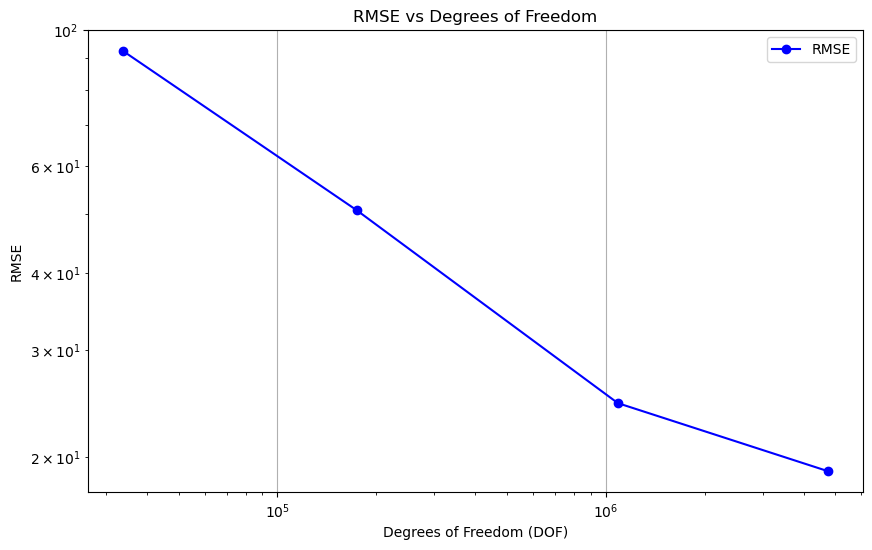

In [2]:
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

# Adding path for your custom functions (if needed)
sys.path.append('/home/yanjun/documents/fenicsx/project/therm_disc/implicit/tetrahedron/')

from disc_f import *  # Assuming this file has functions like collect_csv_files, extract_file_labels, etc.

# Directory containing your simulation results
source_dir = '/home/yanjun/documents/sim_results/implicit_dx/'

# Collect all CSV files from the directory
csv_files = collect_csv_files(source_dir)

# Sort CSV files by mesh size or other labels (e.g., 'mesh_size')
type1 = 'mesh_size'
csv_files.sort(key=lambda x: extract_file_labels(x, type1))

# Read experimental data
df1 = pd.read_csv('/home/yanjun/documents/sim_results/experiment_result.csv')
T_e_ave = (df1.iloc[:, 1] + df1.iloc[:, 3] + df1.iloc[:, 5]) / 3  # Average of experimental temperatures

# Initialize lists to store DOF and average relative errors for each case
dof_list = []
avg_rmse_errors = []

# Loop over all CSV files (cases)
for csv_file in csv_files:
    # Extract mesh information and calculate DOF (elements * 4)
    labels = find_3_coord(extract_mesh_labels(csv_file))
    num_elements = extract_file_labels(csv_file, type1)
    dof = int(num_elements) * 4  # DOF calculation

    # Read simulated time and temperature data
    t, T = read_t_T(csv_file)

    # Calculate average temperature at the three labels
    T_3_ave = []
    for i in range(len(T)):
        T_3_all = T[i][labels[0]] + T[i][labels[1]] + T[i][labels[2]]
        T_3_ave.append(T_3_all / 3)

    time_T_e_ave = np.linspace(0, 49, len(T_e_ave))  # Time for T_e_ave (example)
    time_T_3_ave = np.linspace(0, 49, len(T_3_ave))  # Time for T_3_ave (example)

    # Interpolate T_e_ave to have the same length as T_3_ave
    T_e_ave_resampled = np.interp(time_T_3_ave, time_T_e_ave, T_e_ave)

    sum = 0;
    for i in range(len(T_3_ave)):
        sum = sum + np.abs(T_3_ave[i]-T_e_ave_resampled[i])
    rmse_error = sum/ len(T);


    # Store DOF and the average relative error for this case
    dof_list.append(dof)
    avg_rmse_errors.append(rmse_error)

# Plot DOF vs Average Relative Error
plt.figure(figsize=(10, 6))
plt.loglog(dof_list, avg_rmse_errors, marker='o', linestyle='-', color='b', label="RMSE")

# Label the axes
plt.xlabel('Degrees of Freedom (DOF)')
plt.ylabel('RMSE')
plt.title('RMSE vs Degrees of Freedom')

# Add grid and legend

plt.grid(True, which="both", ls="--")
plt.legend()

# Save and display the plot
plt.savefig('RMSE_vs_dof.png')
plt.show()


# Max

Lables already exists, for mesh m-3-20.msh is  [1713, 1587, 708]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-20-c-1-e-8476/Result_T-s-608-d-224-m-3-20-c-1-e-8476.csv
Lables already exists, for mesh m-3-10.msh is  [3157, 7018, 2141]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-10-c-1-e-43604/Result_T-s-608-d-224-m-3-10-c-1-e-43604.csv
Lables already exists, for mesh m-3-5.msh is  [19098, 34079, 7351]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-5-c-1-e-271817/Result_T-s-608-d-224-m-3-5-c-1-e-271817.csv


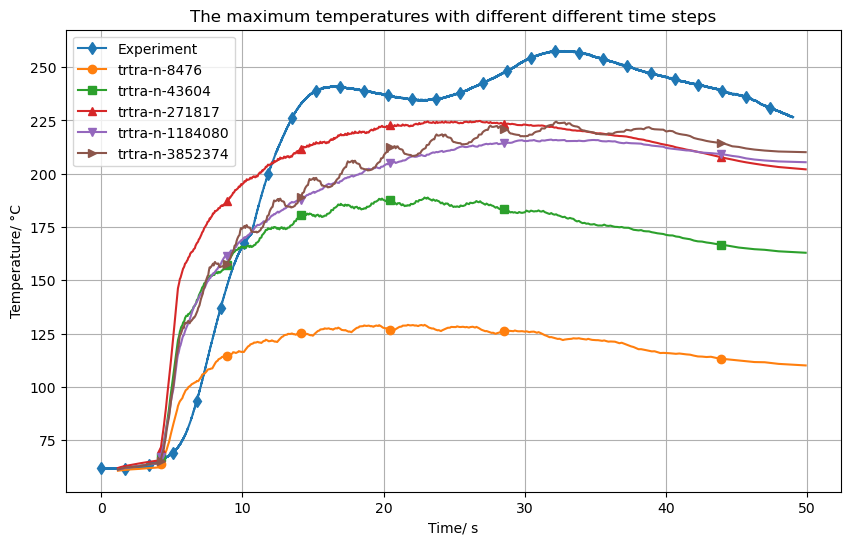

In [10]:
import os
import shutil
import pandas as pd
import re
import sys
import matplotlib.pyplot as plt
import numpy as np


sys.path.append('/home/yanjun/documents/fenicsx/project/therm_disc/implicit/tetrahedron/')
from disc_f import *
source_dir = '/home/yanjun/documents/sim_results/implicit_dx/'

# Collect all CSV files from the destination directory
csv_files = collect_csv_files(source_dir)
type1 = 'mesh_size'
csv_files.sort(key=lambda x: extract_file_labels(x,type1))

plt.figure(figsize=(10, 6))


df1 = pd.read_csv('/home/yanjun/documents/sim_results/experiment_result.csv')
T_e_max = np.maximum( np.maximum (df1.iloc[:,1], df1.iloc[:,3]) , df1.iloc[:,5] ) 
t_e = np.linspace (0, 49, len(T_e_max) )
plt.plot(t_e, T_e_max, label= "Experiment",marker='d',markevery=1000)

j = 0
marker_styles = ['o', 's', '^', 'v', '>', '<', 'd' ] 

#####
for csv_file in csv_files[0:3]:
    lables = find_3_coord(  extract_mesh_labels(csv_file)  )
    t,T = read_t_T ( csv_file )
    #calculate average temperature
    T_max = []
    for i in range(len(T)):
        T_max.append( max(T[i]) )
    plt.plot(t,pd.Series(T_max).rolling(window=30).mean(),label= f'trtra-n-{ extract_file_labels(csv_file, type1)  }',
             marker=marker_styles[j], markevery=100)
    j += 1

## 4 and 6 is the extract csv files for m-3-2 and m-3-3.
csv_files1 = [ csv_files[3] , csv_files[5] ]
labels=['trtra-n-1184080','trtra-n-3852374']
k = 0
for csv_file in csv_files1:
     df = pd.read_csv(csv_file)
     # Assuming the CSV files have columns 'Time' and 'temperature
     plt.plot( df['Time'], df['max(f)'].rolling(window = 30).mean(), label = labels[k-0],marker=marker_styles[j], markevery=100)
     k += 1
     j += 1

####

plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('The maximum temperatures with different different time steps')
plt.legend()
plt.grid(True)
plt.savefig('T_max_time_step.png')
plt.show()
